In [27]:
import pandas as pd
df = pd.read_csv('data_after_pandas.csv')
df.head()

,label,amount,volume,Amt_div_Vol
0,-1,23113899.0,3043606.0,7.594248
1,-1,20044777.0,2646800.0,7.573212
2,-1,26685116.0,3516788.0,7.587923
3,-1,23621771.0,3130529.0,7.545616
4,1,24481103.0,3288319.0,7.444869


In [29]:
# define X and y
features_cols = ['amount','volume','Amt_div_Vol']
X = df[features_cols]
# 特征(X)标准化
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X)#创建一个缩放器对象
X = scaler.transform(X)
y = df.label
print(X,y)

[[-0.62 -0.77 -0.58]
 [-0.63 -0.79 -0.58]
 [-0.62 -0.76 -0.58]
 ...
 [ 0.77  0.07  2.26]
 [ 0.13 -0.31  1.94]
 [-0.   -0.42  2.01]] 0     -1
1     -1
2     -1
3     -1
4      1
5      1
6     -1
7     -1
8     -1
9     -1
10     1
11     1
12     1
13     1
14     1
15    -1
16    -1
17    -1
18    -1
19     1
20    -1
21    -1
22     1
23     1
24    -1
25    -1
26    -1
27    -1
28    -1
29    -1
      ..
458    1
459    1
460    1
461    1
462    1
463    1
464   -1
465   -1
466    1
467    1
468    1
469    1
470   -1
471   -1
472   -1
473   -1
474   -1
475   -1
476    1
477    1
478    1
479    1
480    1
481    1
482    1
483    1
484    1
485    1
486    1
487    1
Name: label, Length: 488, dtype: int64


In [23]:
# split X and y into training and testing sets
# 'from sklearn.cross_validation import train_test_split' is deprecated
from sklearn.model_selection import train_test_split
#参数说明random_state =0：多次运行产生相同的随机数；stratify：解决类不平衡问题
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.25,stratify=y)
print(X_train, X_test, y_train, y_test)

[[ 0.03  0.31 -0.08]
 [-0.08  0.21 -0.2 ]
 [ 0.51  1.34 -0.22]
 ...
 [ 1.57  0.19  3.7 ]
 [-0.51 -0.52 -0.49]
 [-0.59 -0.67 -0.62]] [[-0.61 -0.75 -0.59]
 [-0.58 -0.63 -0.67]
 [ 0.03 -0.47  2.69]
 [-0.28  0.07 -0.55]
 [-0.39 -0.23 -0.51]
 [-0.53 -0.54 -0.57]
 [ 0.21  0.67 -0.14]
 [ 1.78  1.51  1.04]
 [-0.39 -0.17 -0.58]
 [ 0.69 -0.21  3.52]
 [-0.44 -0.27 -0.61]
 [-0.38 -0.15 -0.57]
 [-0.56 -0.59 -0.63]
 [-0.57 -0.64 -0.56]
 [-0.47 -0.41 -0.53]
 [-0.25  0.11 -0.5 ]
 [-0.2   0.06 -0.33]
 [-0.47 -0.37 -0.59]
 [-0.54 -0.54 -0.62]
 [ 3.23  2.7   1.21]
 [ 0.86  0.09  2.42]
 [-0.41 -0.33 -0.41]
 [-0.56 -0.6  -0.59]
 [ 0.98  1.53  0.16]
 [ 0.87  0.58  1.1 ]
 [-0.46 -0.39 -0.5 ]
 [-0.52 -0.52 -0.58]
 [-0.6  -0.72 -0.56]
 [-0.6  -0.71 -0.6 ]
 [-0.44 -0.32 -0.57]
 [-0.52 -0.51 -0.57]
 [-0.6  -0.71 -0.6 ]
 [-0.45 -0.48 -0.21]
 [ 4.55  5.62  0.48]
 [-0.58 -0.67 -0.57]
 [-0.45 -0.4  -0.45]
 [-0.02  0.31 -0.19]
 [ 1.04  0.83  0.96]
 [ 0.04  0.32 -0.08]
 [ 1.56  1.34  0.99]
 [ 0.79  0.73  0.73]
 [-0.11

In [7]:
# #找到最优超参数
# from sklearn.model_selection import GridSearchCV
# from sklearn import svm
# #用两个grid核函数:rbf,linear.并设定预选值
# tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
#                      'C': [1, 10, 100, 1000]},
#                     {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
# # scores = ['precision','recall']
# clf = GridSearchCV(svm.SVC(),tuned_parameters,cv=5)
# print('hyper parameters found finished')

hyper parameters found finished


In [33]:
from sklearn import svm
clf = svm.SVC()
# 训练模型
clf.fit(X_train,y_train)
# print(clf.best_params_)
# best_clf = clf.best_estimator_
# 预测结果
predictions = clf.predict(X_test)
print('predictions:',predictions)
# 计算正确率
from sklearn import metrics
accuracy_score = metrics.accuracy_score(y_test, predictions)
print('accuracy_score:',accuracy_score)
#计算召回率（Recall）
recall_score = metrics.recall_score(y_test,predictions)
print('recall_score:',recall_score)
#计算准确率(Precision)
precision_score = metrics.precision_score(y_test,predictions)
print('precision_score',precision_score)
#计算预测的具体值,后文画roc曲线要用的
y_scores = clf.decision_function(X_test)
print('y_scores:',y_scores)

predictions: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1]
accuracy_score: 0.6721311475409836
recall_score: 1.0
precision_score 0.6721311475409836
y_scores: [1.   1.   0.95 1.   1.   1.   1.02 0.91 1.   0.81 1.   1.   1.   1.
 1.   1.   1.   1.   1.   1.17 1.01 1.   1.   1.08 0.96 1.   1.   1.
 1.   1.   1.   1.   0.99 0.84 1.   1.   1.   0.98 1.   0.94 1.02 1.
 0.98 0.96 1.   1.   1.01 1.04 0.97 1.   1.   1.   1.   1.   1.   0.99
 1.   0.99 1.   1.   0.99 1.   0.26 0.97 1.   1.   0.94 0.97 1.   1.
 1.   1.   1.   0.98 1.   1.   1.   1.   1.   1.   1.   1.   1.02 0.9
 1.   1.   1.   1.   0.99 1.   1.   0.99 1.   1.   0.94 1.   1.26 1.
 1.   0.99 1.   1.   1.   1.   0.9  0.96 1.   1.   1.04 1.   1.   1.
 0.94 1.   0.94 1.   1.   1.   1.   1.   1.   1.03]


Confusion matrix, without normalization
[[ 0 40]
 [ 0 82]]
Normalized confusion matrix
[[0. 1.]
 [0. 1.]]


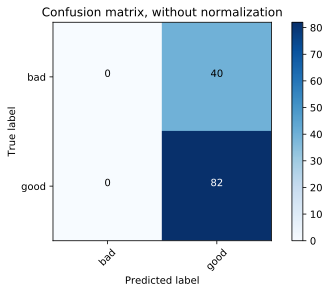

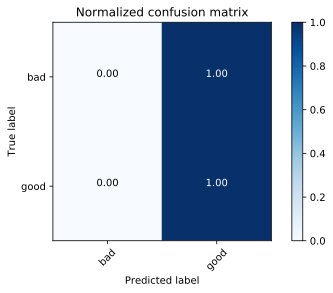

In [43]:
# 混淆矩阵
import itertools
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
# %config InlineBackend.figure_format = 'svg'
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """        
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predictions)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['bad','good'],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['bad','good'], normalize=True,
                      title='Normalized confusion matrix')


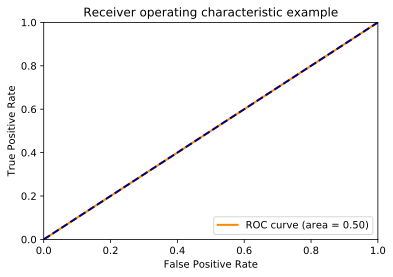

In [26]:
# 绘制roc曲线
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds = roc_curve(y_test,predictions)
# print("y_scores:"+y_scores+"fpr:"+fpr+"tpr:"+tpr)
roc_auc = auc(fpr,tpr) ###计算auc的值

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")